In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

<style>
    .md {
        background-color: #42EADDFF;
        color: #000000FF;
        font-weight:bold;
    }
</style>
<div class="md">
<ul>
<li>Import and display the data </li>
<li>Rename columns conveniently</li>
<li>Check for null values</li>
<li>Remove unnecessary columns</li>
<li>Show the resulting dataframe</li>
<ul>
</div>

In [2]:
refugees_df = pd.read_csv('../data/refugees.csv', skipfooter=4, engine='python')
refugees_df.head()

,Country or territory of asylum or residence,Country or territory of origin,Year,Refugees*,Refugees assisted by UNHCR,Total refugees and people in refugee-like situations**,Total refugees and people in refugee-like situations assisted by UNHCR
0,Afghanistan,Iran (Islamic Rep. of),2021,38,38,38,38
1,Afghanistan,Pakistan,2021,72188,123,72188,123
2,Albania,China,2021,14,0,14,0
3,Albania,Egypt,2021,5,0,5,0
4,Albania,Iraq,2021,5,0,5,0


Refugee*:

*Persons recognized as refugees under the 1951 UN Convention/1967 Protocol, the 1969 OAU Convention, in accordance with the UNHCR Statute, persons granted a complementary form of protection and those granted temporary protection. In the absence of Government estimates, UNHCR has estimated the refugee population in 24 industrialized countries based on 10 years of individual refugee recognition.*

In [3]:
refugees_df = refugees_df.rename(columns={"Country or territory of asylum or residence": "Acceptor", "Country or territory of origin":"Origin", "Refugees*": "Refugees"})

In [4]:
refugees_df.isnull().values.any()

False

In [5]:
cols_to_drop = [x for x in list(refugees_df) if x not in ["Acceptor", "Origin", "Refugees", "Year"]]
refugees_df = refugees_df.drop(columns=cols_to_drop)

In [6]:
refugees_df.head()

,Acceptor,Origin,Year,Refugees
0,Afghanistan,Iran (Islamic Rep. of),2021,38
1,Afghanistan,Pakistan,2021,72188
2,Albania,China,2021,14
3,Albania,Egypt,2021,5
4,Albania,Iraq,2021,5


<style>
    .md {
        background-color: #42EADDFF;
        color: #000000FF;
        font-weight:bold;
    }
</style>
<div class="md">
<ul>
<li>How many countries did refugees originate from and how many countries accepted refugees?  </li>
<li>What is the time frame of the data? </li>
<ul>
</div>

In [7]:
print("Number of Host Countries: ", refugees_df["Acceptor"].nunique())
print("Number of Origin Countries: ", refugees_df["Origin"].nunique())
print("Years of Data: ", refugees_df["Year"].nunique(), "from ", refugees_df["Year"].min(), "to", refugees_df["Year"].max())

Number of Host Countries:  183
Number of Origin Countries:  201
Years of Data:  47 from  1975 to 2021


<style>
    .md {
        background-color: #42EADDFF;
        color: #000000FF;
        font-weight:bold;
    }
</style>
<div class="md">
<ul>
<li>Find all the country names longer than 15 characters from both the Acceptor and Donor columns</li>
<li>Create a dictionary with shortened versions of these names</li>
<li>Replace all these names with their shortened versions</li>
<ul>
</div>

In [8]:
acceptor_country_names =  list(refugees_df["Acceptor"].unique())
origin_country_names = list(refugees_df["Origin"].unique())
country_names = list(set().union(set(acceptor_country_names), set(origin_country_names)))

long_country_names = [x for x in country_names if len(x)>15]
long_country_names

['Russian Federation',
 'Sint Maarten (Dutch part)',
 "Dem. People's Rep. of Korea",
 'United States of America',
 'Venezuela (Bolivarian Republic of)',
 'Syrian Arab Rep.',
 'Marshall Islands',
 'China, Macao SAR',
 'Antigua and Barbuda',
 'United Rep. of Tanzania',
 'Dem. Rep. of the Congo',
 'Saint Vincent and the Grenadines',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Saint Kitts and Nevis',
 'Congo, Republic of',
 'Equatorial Guinea',
 'China, Hong Kong SAR',
 'Trinidad and Tobago',
 'State of Palestine',
 'Iran (Islamic Rep. of)',
 "Lao People's Dem. Rep.",
 'Central African Rep.',
 'Brunei Darussalam',
 'Turks and Caicos Islands',
 'Papua New Guinea',
 'Micronesia (Federated States of)',
 'Serbia and Kosovo: S/RES/1244 (1999)',
 'Sao Tome and Principe',
 'United Arab Emirates']

In [9]:
short_names_dict = {'Serbia and Kosovo: S/RES/1244 (1999)' : 'Serbia/Kosovo',
               'Venezuela (Bolivarian Republic of)': 'Venezuela',
               'Micronesia (Federated States of)': 'Micronesia',
               'Sint Maarten (Dutch part)': "St Maarten (Dutch)",
               'Turks and Caicos Islands': "Turks Caicos",
               'United States of America': "USA",
               'United Rep. of Tanzania': 'Tanzania',
               'Bosnia and Herzegovina': "Bosnia/Herzegovina",
                'Dem. Rep. of the Congo': 'Dem Rep. Congo',
                'Iran (Islamic Rep. of)': "Iran",
                "Lao People's Dem. Rep.":"Laos",
                 'Saint Kitts and Nevis': "St Kitts Nevis",
                 'China, Hong Kong SAR': 'Hong Kong',
                 'United Arab Emirates': 'UAE',
                 'Trinidad and Tobago': "Trinidad/Tobago",
                  'Antigua and Barbuda':  'Antigua/Barbuda',
                  'Congo, Republic of':'Congo',
                  'Russian Federation': "Russia",
                   'Syrian Arab Rep.': 'Syria',
                   'China, Macao SAR': "Macao (China)",
                 "Dem. People's Rep. of Korea": "North Korea",
                 'Rep. of Korea':"South Korea",
                 'Sao Tome and Principe': 'Sao Tome/Principe',
                 'Brunei Darussalam': "Brunei",
                 'Marshall Islands': "Marshall Isl",
                 'Saint Vincent and the Grenadines': "St Vincent Grenadines",
                 'Equatorial Guinea': 'Equato. Guinea',
                 'Bolivia (Plurinational State of)': 'Bolivia',
                 'State of Palestine': 'Palestine',

               }

In [10]:
for key in short_names_dict.keys():
    refugees_df = refugees_df.replace(key, short_names_dict[key])

<style>
    .md {
        background-color: #42EADDFF;
        color: #000000FF;
        font-weight:bold;
    }
</style>
<div class="md">
<ul>
<li>Make a graph of the total number of refugees per year.</li>
<ul>
</div>


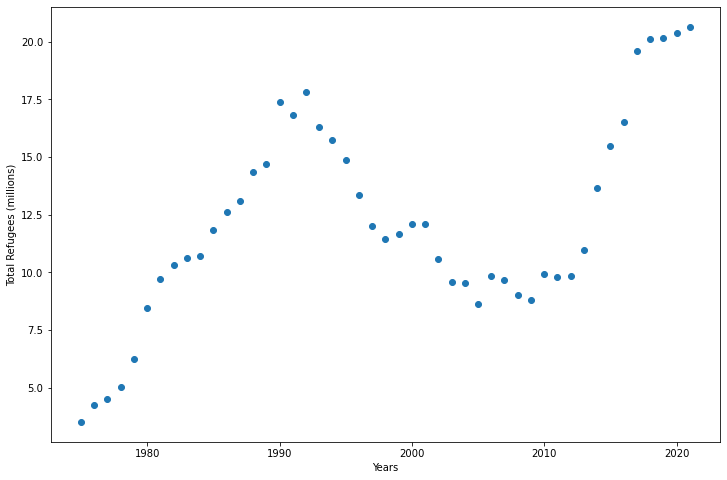

In [11]:
refugees_by_year_df = refugees_df.groupby(by="Year").sum()
refugees_by_year_df = refugees_by_year_df.reset_index()
plt.figure(figsize=(12, 8)) 
plt.scatter(refugees_by_year_df["Year"], refugees_by_year_df["Refugees"]/1000000)
plt.ylabel("Total Refugees (millions)")
plt.xlabel("Years")
plt.show()

<style>
    .md {
        background-color: #42EADDFF;
        color: #000000FF;
        font-weight:bold;
    }
</style>
<div class="md">
<ul>
<li>What are the top 5 countries that refugees originated from in any given year? </li>
<li>What are the top 5 countries that refugees migrated to in the same year? </li>
<li>Show both numerical values and percentages.</li>
<ul>
</div>

In [12]:
def total_refugees_by_year(yr):
    """
    Calculate the total number of refugees for a given year.

    Parameters:
        yr (int): The year for which to calculate the total number of refugees.

    Returns:
        int: The total number of refugees in the specified year.

    Example:
        total_refugees = total_refugees_by_year(2023)
        print(total_refugees)  # Output: 123456
    """
    return refugees_df[refugees_df["Year"] == yr]["Refugees"].sum()

def total_refugees_by_year_and_country(yr, country_type="Origin"):
    """
    Calculate the total number of refugees in a given year for either Origin countries
    or Host countries and return the data as a DataFrame with percentage information.

    Parameters:
        yr (int): The year for which to calculate the total number of refugees.
        country_type (str): The type of country to consider, either "Origin" or "Host."
                            Defaults to "Origin."

    Returns:
        pandas.DataFrame: A DataFrame containing the total number of refugees and
        the percentage of refugees for each country in the specified year, sorted by
        the number of refugees in descending order.

    Example:
        # Calculate total refugees by Origin countries for the year 2023
        origin_refugees_2023 = total_refugees_by_year_and_country(2023, "Origin")

        # Calculate total refugees by Host countries for the year 2023 (default)
        host_refugees_2023 = total_refugees_by_year_and_country(2023)

        # Display the dataframes
        print(origin_refugees_2023)
        print(host_refugees_2023)
    """
    total = total_refugees_by_year(yr)
    grouped = refugees_df[refugees_df["Year"] == yr].groupby(by=country_type).sum()
    df = grouped.reset_index()
    df = df.drop(columns=["Year"])
    df["Percentage"] = 100*df["Refugees"]/total
    return df.sort_values(by="Refugees", ascending=False).round({"Percentage":0})





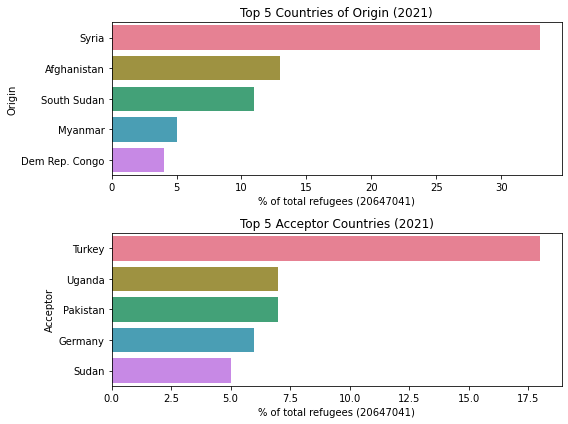

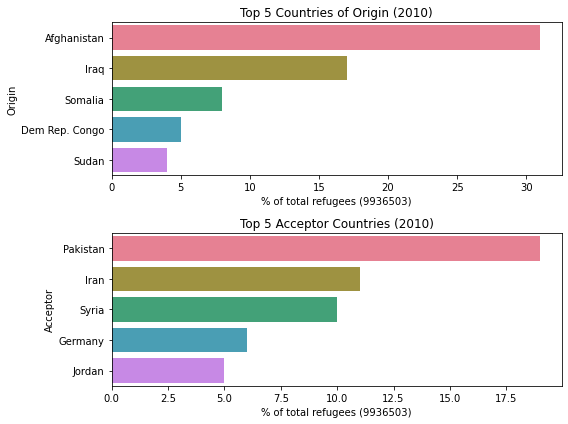

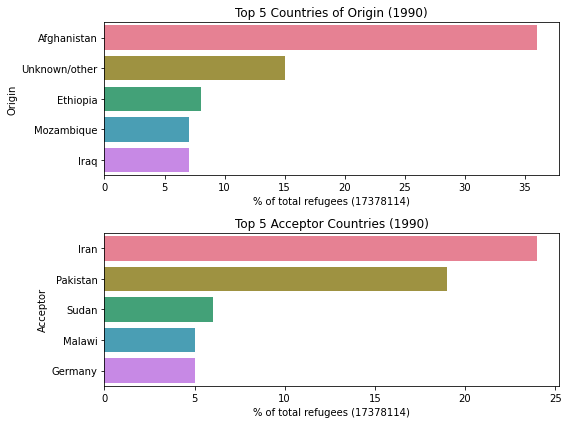

In [13]:
def make_top_donor_host_plot(yr):

    """
    Create a bar plot to visualize the top 5 countries of origin and top 5 acceptor countries
    of refugees for a given year.

    Parameters:
        yr (int): The year for which the refugee data should be visualized.

    Returns:
        None: This function displays the plots but does not return any values.

    Example:
        make_top_donor_host_plot(2023)
    """
    origins = total_refugees_by_year_and_country(yr, "Origin").head()
    hosts = total_refugees_by_year_and_country(yr, "Acceptor").head()
    total = total_refugees_by_year(yr)
    
    # Generate random color palettes
    origin_palette = sns.color_palette("husl", len(origins))
    host_palette = sns.color_palette("husl", len(hosts))

    # Create a figure and two subplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

    # Plot the donors data on the first subplot with a random color palette
    sns.barplot(data=origins, x="Percentage", y="Origin", ax=axes[0], palette=origin_palette)
    axes[0].set_title(f"Top 5 Countries of Origin ({yr})")
    axes[0].set_xlabel(f"% of total refugees ({total})")

    # Plot the hosts data on the second subplot with a random color palette
    sns.barplot(data=hosts, x="Percentage", y="Acceptor", ax=axes[1], palette=host_palette)
    axes[1].set_title(f"Top 5 Acceptor Countries ({yr})")
    axes[1].set_xlabel(f"% of total refugees ({total})")

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

make_top_donor_host_plot(2021)
make_top_donor_host_plot(2010)
make_top_donor_host_plot(1990)


<style>
    .md {
        background-color: #42EADDFF;
        color: #000000FF;
        font-weight:bold;
    }
</style>
<div class="md">
<ul>
<li>Create a function to show the refugee acceptance history of any country</li>
<li>Display the percentage of total refugees accepted by year for any country</li>
<li>The timeframe should be all 47 years or a given subset of years</li>
</ul>
</div>


In [14]:
def refugee_acceptance_history(country, years=[]):
    """
    Generate a historical overview of refugee acceptance by a specific country over the years.

    This function calculates and returns a DataFrame that shows the total number of refugees
    accepted by the specified country for each year, along with the percentage of the country's
    total refugees for each year.

    Parameters:
        country (str): The name of the country for which to generate the acceptance history.
        years (list of int, optional): A list containing two integers [start_year, end_year]
            specifying the range of years to include in the historical overview. If not
            provided, data for all available years will be included.

    Returns:
        pandas.DataFrame: A DataFrame containing the historical data of refugee acceptance
        by the specified country, including year, total refugees accepted, and the percentage
        of total refugees for each year.

    Example:
        # Generate refugee acceptance history for the United States from 2010 to 2020
        usa_acceptance_history = refugee_acceptance_history("United States", years=[2010, 2020])

        # Generate refugee acceptance history for the United Kingdom for all available years
        uk_acceptance_history = refugee_acceptance_history("United Kingdom")

        # Display the dataframes
        print(usa_acceptance_history)
        print(uk_acceptance_history)
    """
    df = refugees_df[refugees_df["Acceptor"] == country].groupby(by="Year").sum()
    df.reset_index(inplace=True)
    
    if years:
        [start_year, end_year] = years
        df = df.query(f'Year >= {start_year} & Year <= {end_year}')

    # Creating a copy of the DataFrame to avoid the SettingWithCopyWarning
    df = df.copy()
    df["Total Refugees"] = df["Year"].apply(total_refugees_by_year)
    df["Percentage"] = 100 * df["Refugees"] / df["Total Refugees"]
    return df


In [25]:
def make_refugee_acceptance_plot(country, years=[]):
    """
    Create a scatter plot displaying the acceptance history of refugees by a given 'country' over specified 'years'.

    Parameters:
    - country (str): The name of the country for which the plot is generated.
    - years (list): A list containing a start year and an end year to specify the range of years to include.
                    Default is an empty list, which includes all available years.

    Returns:
    - None

    This function generates a scatter plot to visualize the acceptance history of refugees by the specified 'country'
    over the specified range of 'years'. The scatter plot shows the percentage of total refugees accepted each year.

    If no data is available for the specified 'country' and 'years', it prints a message and returns without generating a plot.
    """
    df = refugee_acceptance_history(country, years=years)
    if df.empty:
        print(f'No Data available for {country}')
        return
    timeframe = " (All Time)"
    if years:
        [start_year, end_year] = years
        timeframe = f" ({start_year} - {end_year})"

    # Create a subplot for Percentage
    fig, ax = plt.subplots(figsize=(8, 5))  # Setting figsize

    # Generate random color and marker
    random_color = random.choice(['red', 'blue', 'green', 'orange', 'purple'])
    random_marker = random.choice(['o', 's', 'D', '^', 'v'])

    # Scatter plot for Percentage with random color and marker
    ax.scatter(df["Year"], df["Percentage"], label="Percentage", marker=random_marker, color=random_color)
    ax.set_xlabel("Year")
    ax.set_ylabel("% of Total Refugees")
    ax.set_title("Percentage of Total Refugees Accepted: " + country + timeframe)
    ax.grid(True)  # Add a grid

    # Adjust the layout to avoid overlapping labels
    plt.tight_layout()

    # Show the plot
    plt.show()

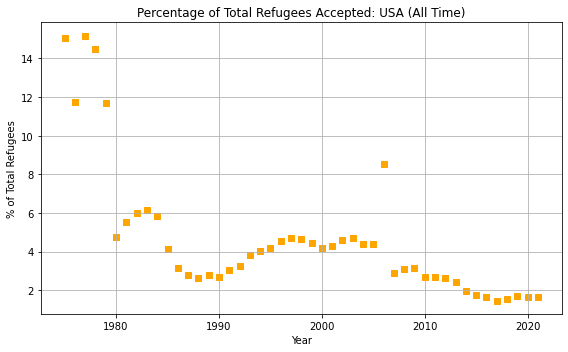

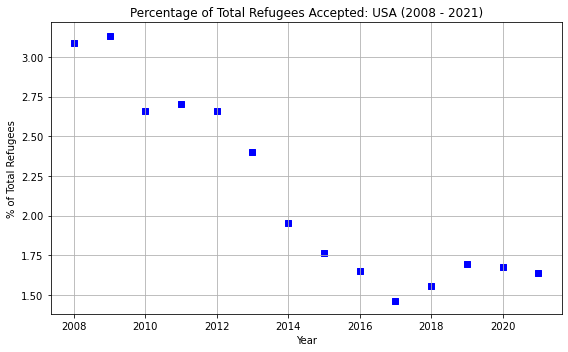

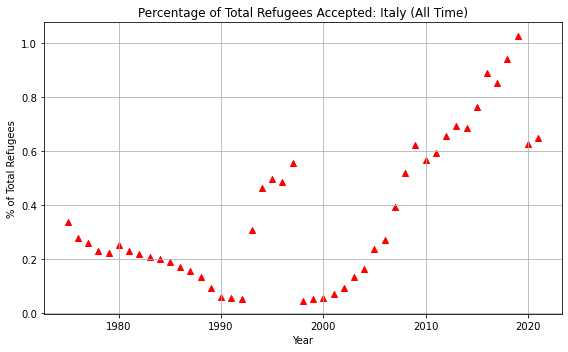

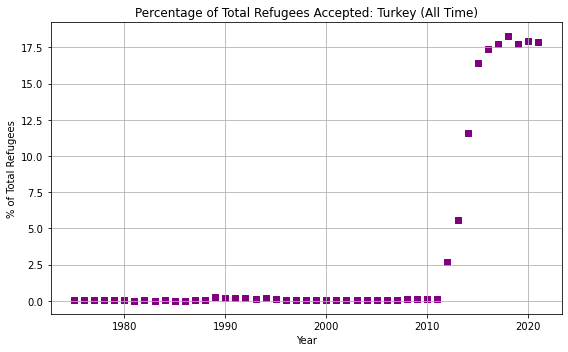

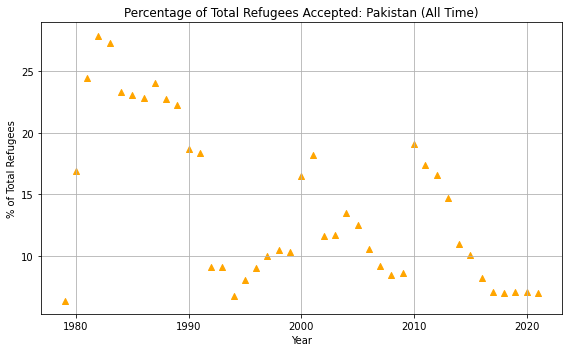

In [26]:
make_refugee_acceptance_plot("USA")
make_refugee_acceptance_plot("USA", [2008,2021])
make_refugee_acceptance_plot('Italy')
make_refugee_acceptance_plot('Turkey')
make_refugee_acceptance_plot('Pakistan')


<style>
    .md {
        background-color: #42EADDFF;
        color: #000000FF;
        font-weight:bold;
    }
</style>
<div class="md">
<ul>
<li>Create a function to show the top 5 countries of origin for refugees accepted by any country in a given year</li>
<li>Display these on a bar plot</li>
</ul>
</div>

In [17]:

def make_refugee_origins_plot(country, yr):
    """
    Create a bar plot displaying the top 5 origin countries for refugees accepted by a given 'country' in a specific 'yr'.

    Parameters:
    - country (str): The name of the country for which the plot is generated.
    - yr (int): The year for which the plot is generated.

    Returns:
    - None

    This function retrieves and visualizes the top 5 origin countries of refugees accepted by the specified 'country'
    in the given 'yr'. It calculates the percentage of refugees from each origin country based on the total number
    of refugees accepted by the 'country' in that 'yr' and displays the information in a bar plot.

    If no data is available for the specified 'country' and 'yr', it prints a message and returns without generating a plot.
    """
    df= refugees_df[(refugees_df["Acceptor"]==country) & (refugees_df["Year"] == yr) ]
    if df.empty:
          print(f'No Data available for {country} in {yr}')
          return
    total = refugees_df[(refugees_df["Acceptor"]==country) & (refugees_df["Year"] == yr) ]["Refugees"].sum()
    df = df.sort_values(by="Refugees",ascending=False)
    df = df.head()
    df["Percentage"] = 100*df["Refugees"]/total
    df["Percentage"] = df["Percentage"].round(2)

    colors = sns.color_palette("hls", 5)
    ax = sns.barplot(data=df, x="Percentage", y="Origin", palette=colors)
    ax.set_xlabel(f"% of total accepted ({total})")
    plt.title(f"Top 5 Origin Countries for Refugees in {country} ({yr})")
    plt.show()



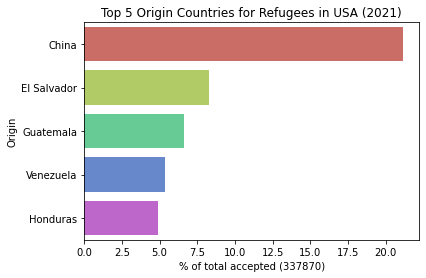

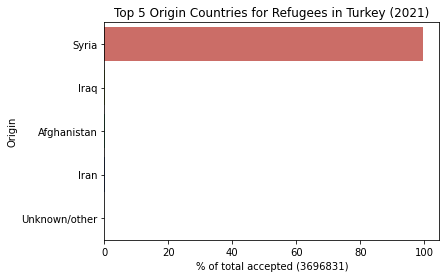

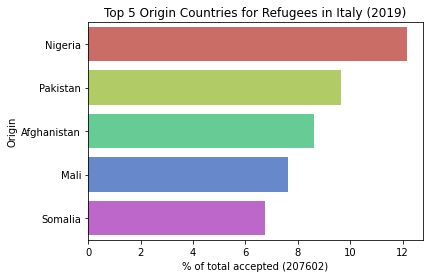

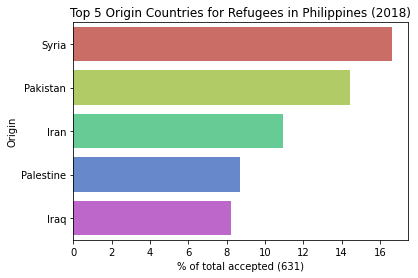

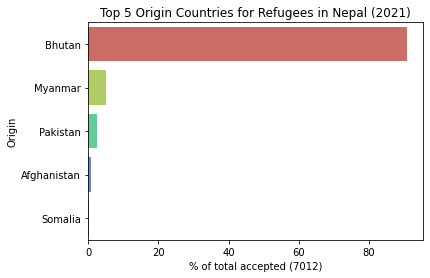

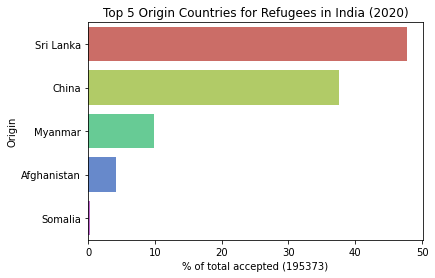

In [18]:
make_refugee_origins_plot("USA", 2021)
make_refugee_origins_plot("Turkey", 2021)
make_refugee_origins_plot("Italy", 2019)
make_refugee_origins_plot("Philippines", 2018)
make_refugee_origins_plot("Nepal", 2021)
make_refugee_origins_plot("India", 2020)